In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data = pd.read_csv("mushrooms.csv")

y = data['class']
x = data.drop(['class', 'veil-type','stalk-root'], axis=1)

In [27]:
columns = np.array(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'])

# Eksplorasi Data

In [28]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# Preprocess Data

## Feature Selection

### Label Encoding

In [29]:
data.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder

le = data.apply(LabelEncoder().fit_transform)
le.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [31]:
le.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

### SelectKBest

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

In [33]:
yle = le['class']
xle = le.drop(['class', 'veil-type','stalk-root'], axis=1)

In [34]:
select = SelectKBest(score_func=chi2).fit(xle,yle)
z = select.transform(xle)
filter = select.get_support()
columns[filter]

array(['cap-surface', 'bruises', 'gill-spacing', 'gill-size',
       'gill-color', 'stalk-surface-above-ring', 'ring-type',
       'spore-print-color', 'population', 'habitat'], dtype='<U24')

In [35]:
pd.DataFrame({'variable': columns,
              'score_chi2': select.scores_}).sort_values(ascending=False, by='score_chi2').reset_index(drop=True)

,variable,score_chi2
0,gill-color,5957.764469
1,ring-type,1950.610146
2,gill-size,1636.606833
3,bruises,1194.277352
4,gill-spacing,826.795274
5,habitat,751.309489
6,spore-print-color,379.132729
7,population,311.766736
8,stalk-surface-above-ring,222.982400
9,cap-surface,214.068544


## Correlation

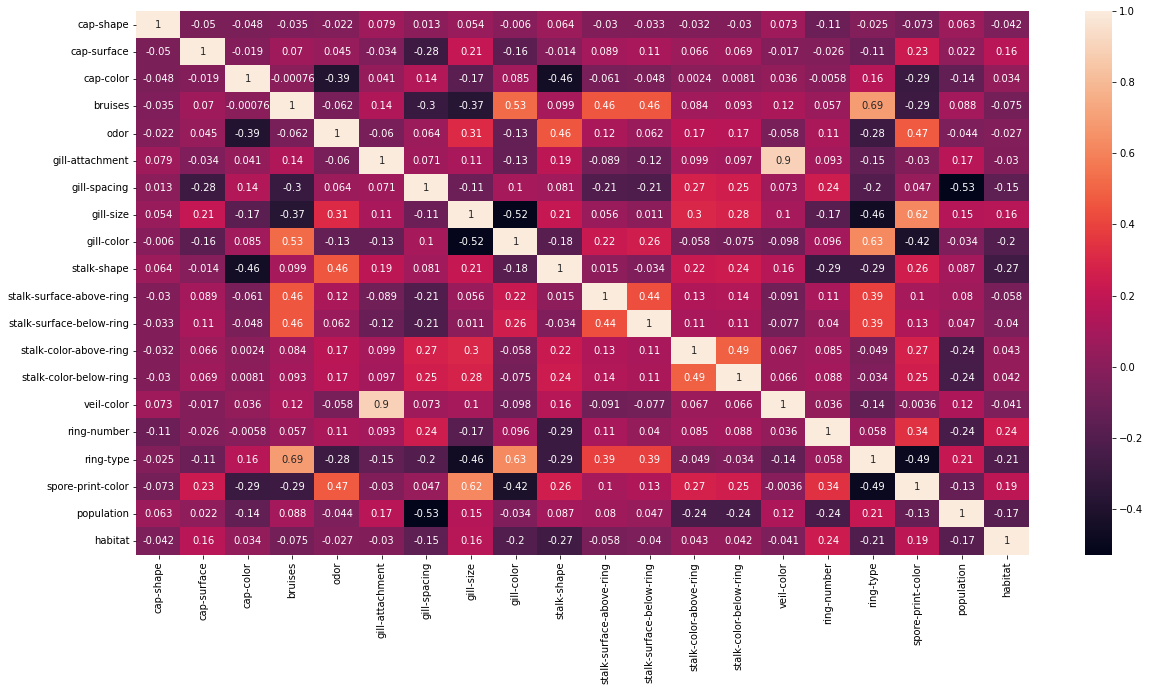

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(xle.corr(), annot=True)

### One Hot Encoder

In [37]:
y = data['class']
x = data.drop(['class', 'veil-type'], axis=1)

feature = columns[filter]
selected = x[feature]
selected

,cap-surface,bruises,gill-spacing,gill-size,gill-color,stalk-surface-above-ring,ring-type,spore-print-color,population,habitat
0,s,t,c,n,k,s,p,k,s,u
1,s,t,c,b,k,s,p,n,n,g
2,s,t,c,b,n,s,p,n,n,m
3,y,t,c,n,n,s,p,k,s,u
4,s,f,w,b,k,s,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...
8119,s,f,c,b,y,s,p,b,c,l
8120,s,f,c,b,y,s,p,b,v,l
8121,s,f,c,b,n,s,p,b,c,l
8122,y,f,c,n,b,s,e,w,v,l


In [38]:
ohe = pd.get_dummies(selected, columns=feature)
ohe.columns

Index(['cap-surface_f', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'bruises_f', 'bruises_t', 'gill-spacing_c', 'gill-spacing_w',
       'gill-size_b', 'gill-size_n', 'gill-color_b', 'gill-color_e',
       'gill-color_g', 'gill-color_h', 'gill-color_k', 'gill-color_n',
       'gill-color_o', 'gill-color_p', 'gill-color_r', 'gill-color_u',
       'gill-color_w', 'gill-color_y', 'stalk-surface-above-ring_f',
       'stalk-surface-above-ring_k', 'stalk-surface-above-ring_s',
       'stalk-surface-above-ring_y', 'ring-type_e', 'ring-type_f',
       'ring-type_l', 'ring-type_n', 'ring-type_p', 'spore-print-color_b',
       'spore-print-color_h', 'spore-print-color_k', 'spore-print-color_n',
       'spore-print-color_o', 'spore-print-color_r', 'spore-print-color_u',
       'spore-print-color_w', 'spore-print-color_y', 'population_a',
       'population_c', 'population_n', 'population_s', 'population_v',
       'population_y', 'habitat_d', 'habitat_g', 'habitat_l', 'habitat_m',


In [39]:
ohe

,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,bruises_f,bruises_t,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,1,0,0,1,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,1,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,1,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,1,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0


# Classification

## Decision Tree

In [40]:
y = yle
x = ohe

from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

parameters = {'splitter' : ['best', 'random'],
              'criterion' :['gini', 'entropy'],
              'min_samples_split':[2, 3, 4, 5], 
              'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
              'class_weight':('balanced', None),
             }


tr = tree.DecisionTreeClassifier()
gsearch = GridSearchCV(tr, parameters)
gsearch.fit(X_train, y_train)
model = gsearch.best_estimator_
model

DecisionTreeClassifier(class_weight='balanced', max_depth=12)

In [41]:
fitur = model.feature_names_in_
importance = model.feature_importances_

fitur_importance = {'Fitur': fitur, 'Importance Values': importance}
fitur_importance_df = pd.DataFrame(data=fitur_importance)
fitur_importance_df.sort_values(by=['Importance Values'], ascending=False)

,Fitur,Importance Values
23,stalk-surface-above-ring_k,3.495550e-01
8,gill-size_b,3.082612e-01
32,spore-print-color_h,1.342399e-01
6,gill-spacing_c,7.993223e-02
0,cap-surface_f,3.285508e-02
36,spore-print-color_r,3.184627e-02
27,ring-type_f,1.675215e-02
4,bruises_f,1.591640e-02
46,habitat_d,1.440731e-02
44,population_v,7.841243e-03


In [42]:
score = model.score(X_test, y_test)
score

1.0

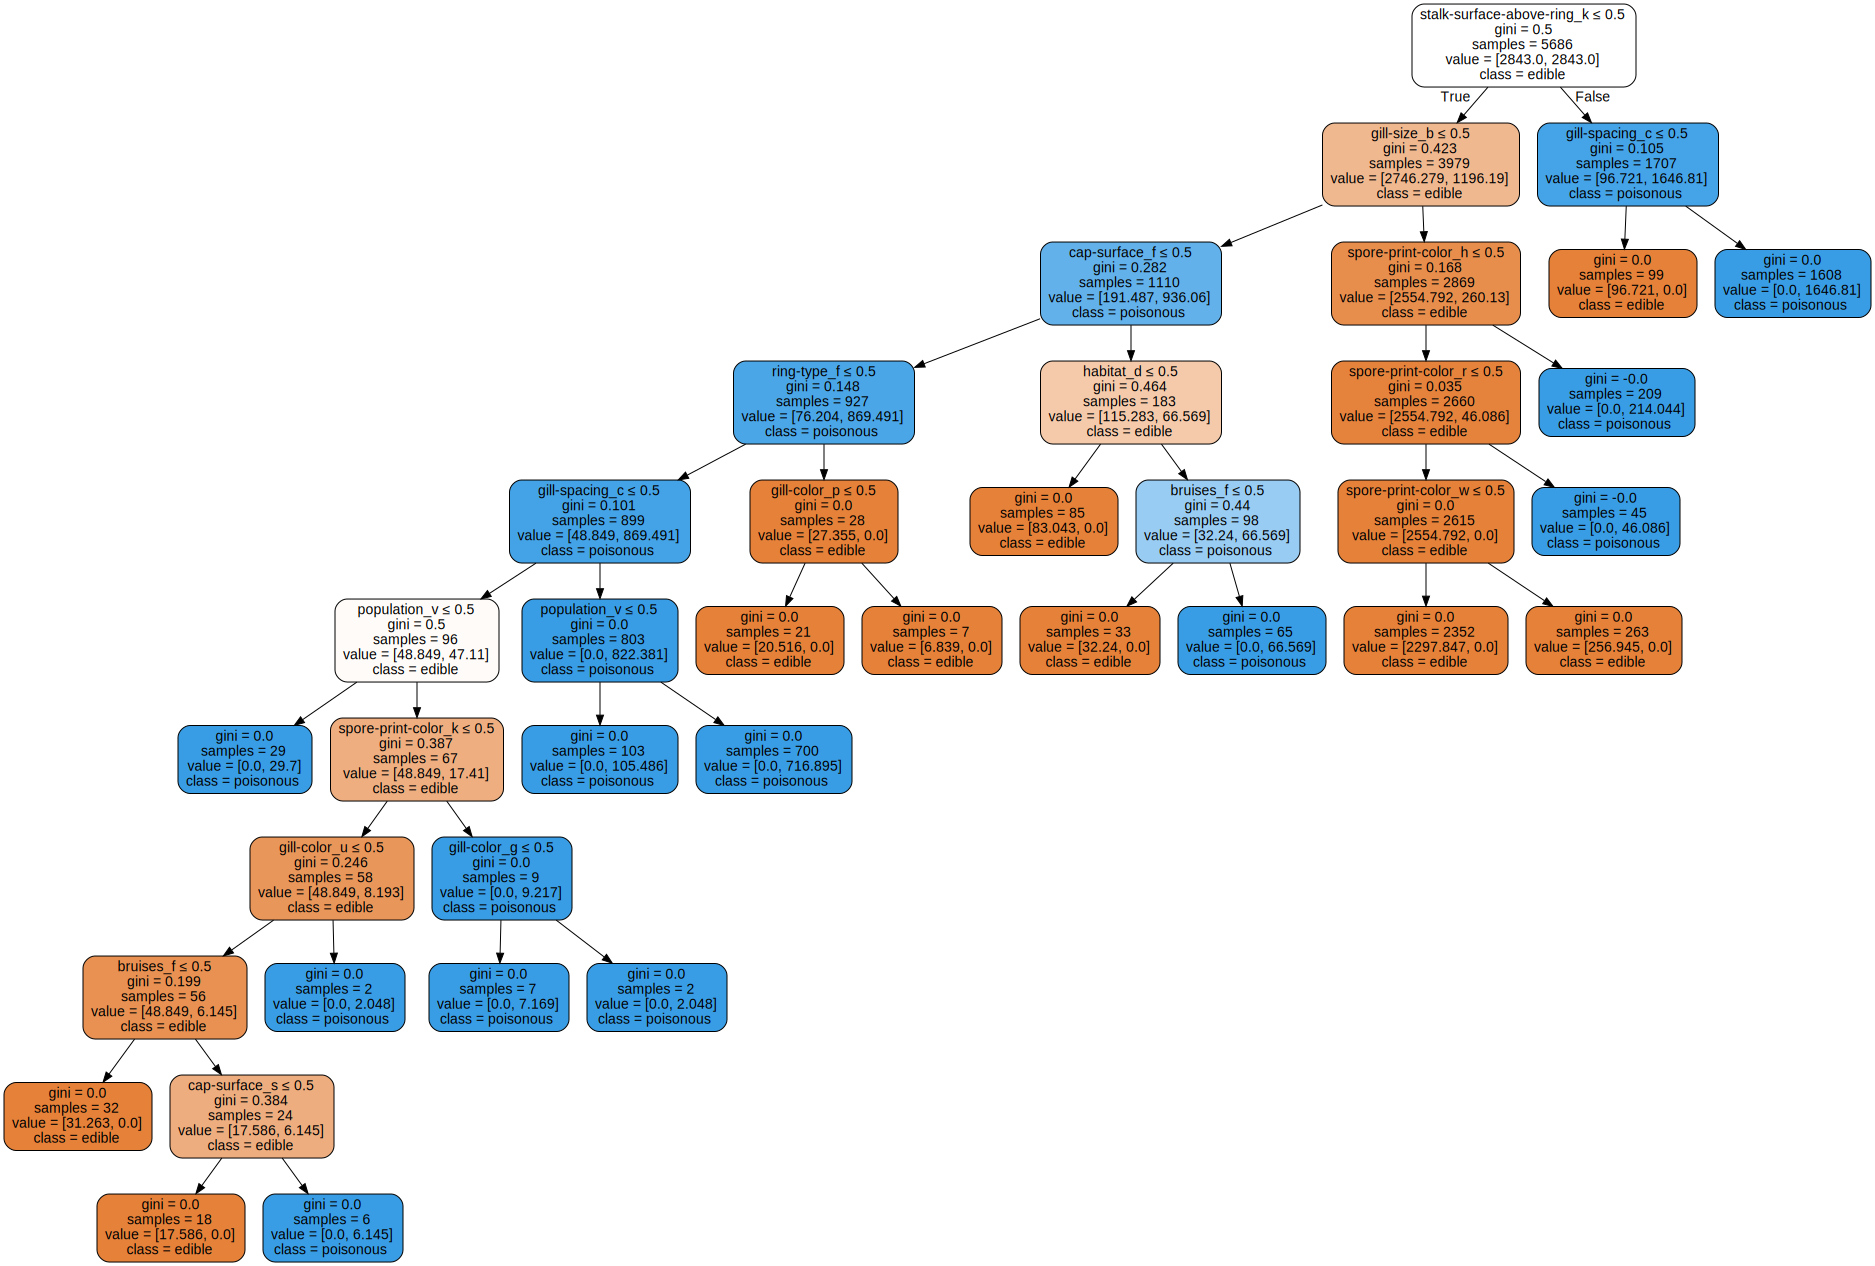

In [43]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=X_test.columns,
                                class_names=['edible', 'poisonous'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data, format="png")
graph
#graph.render("decision_tree_graphivz")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

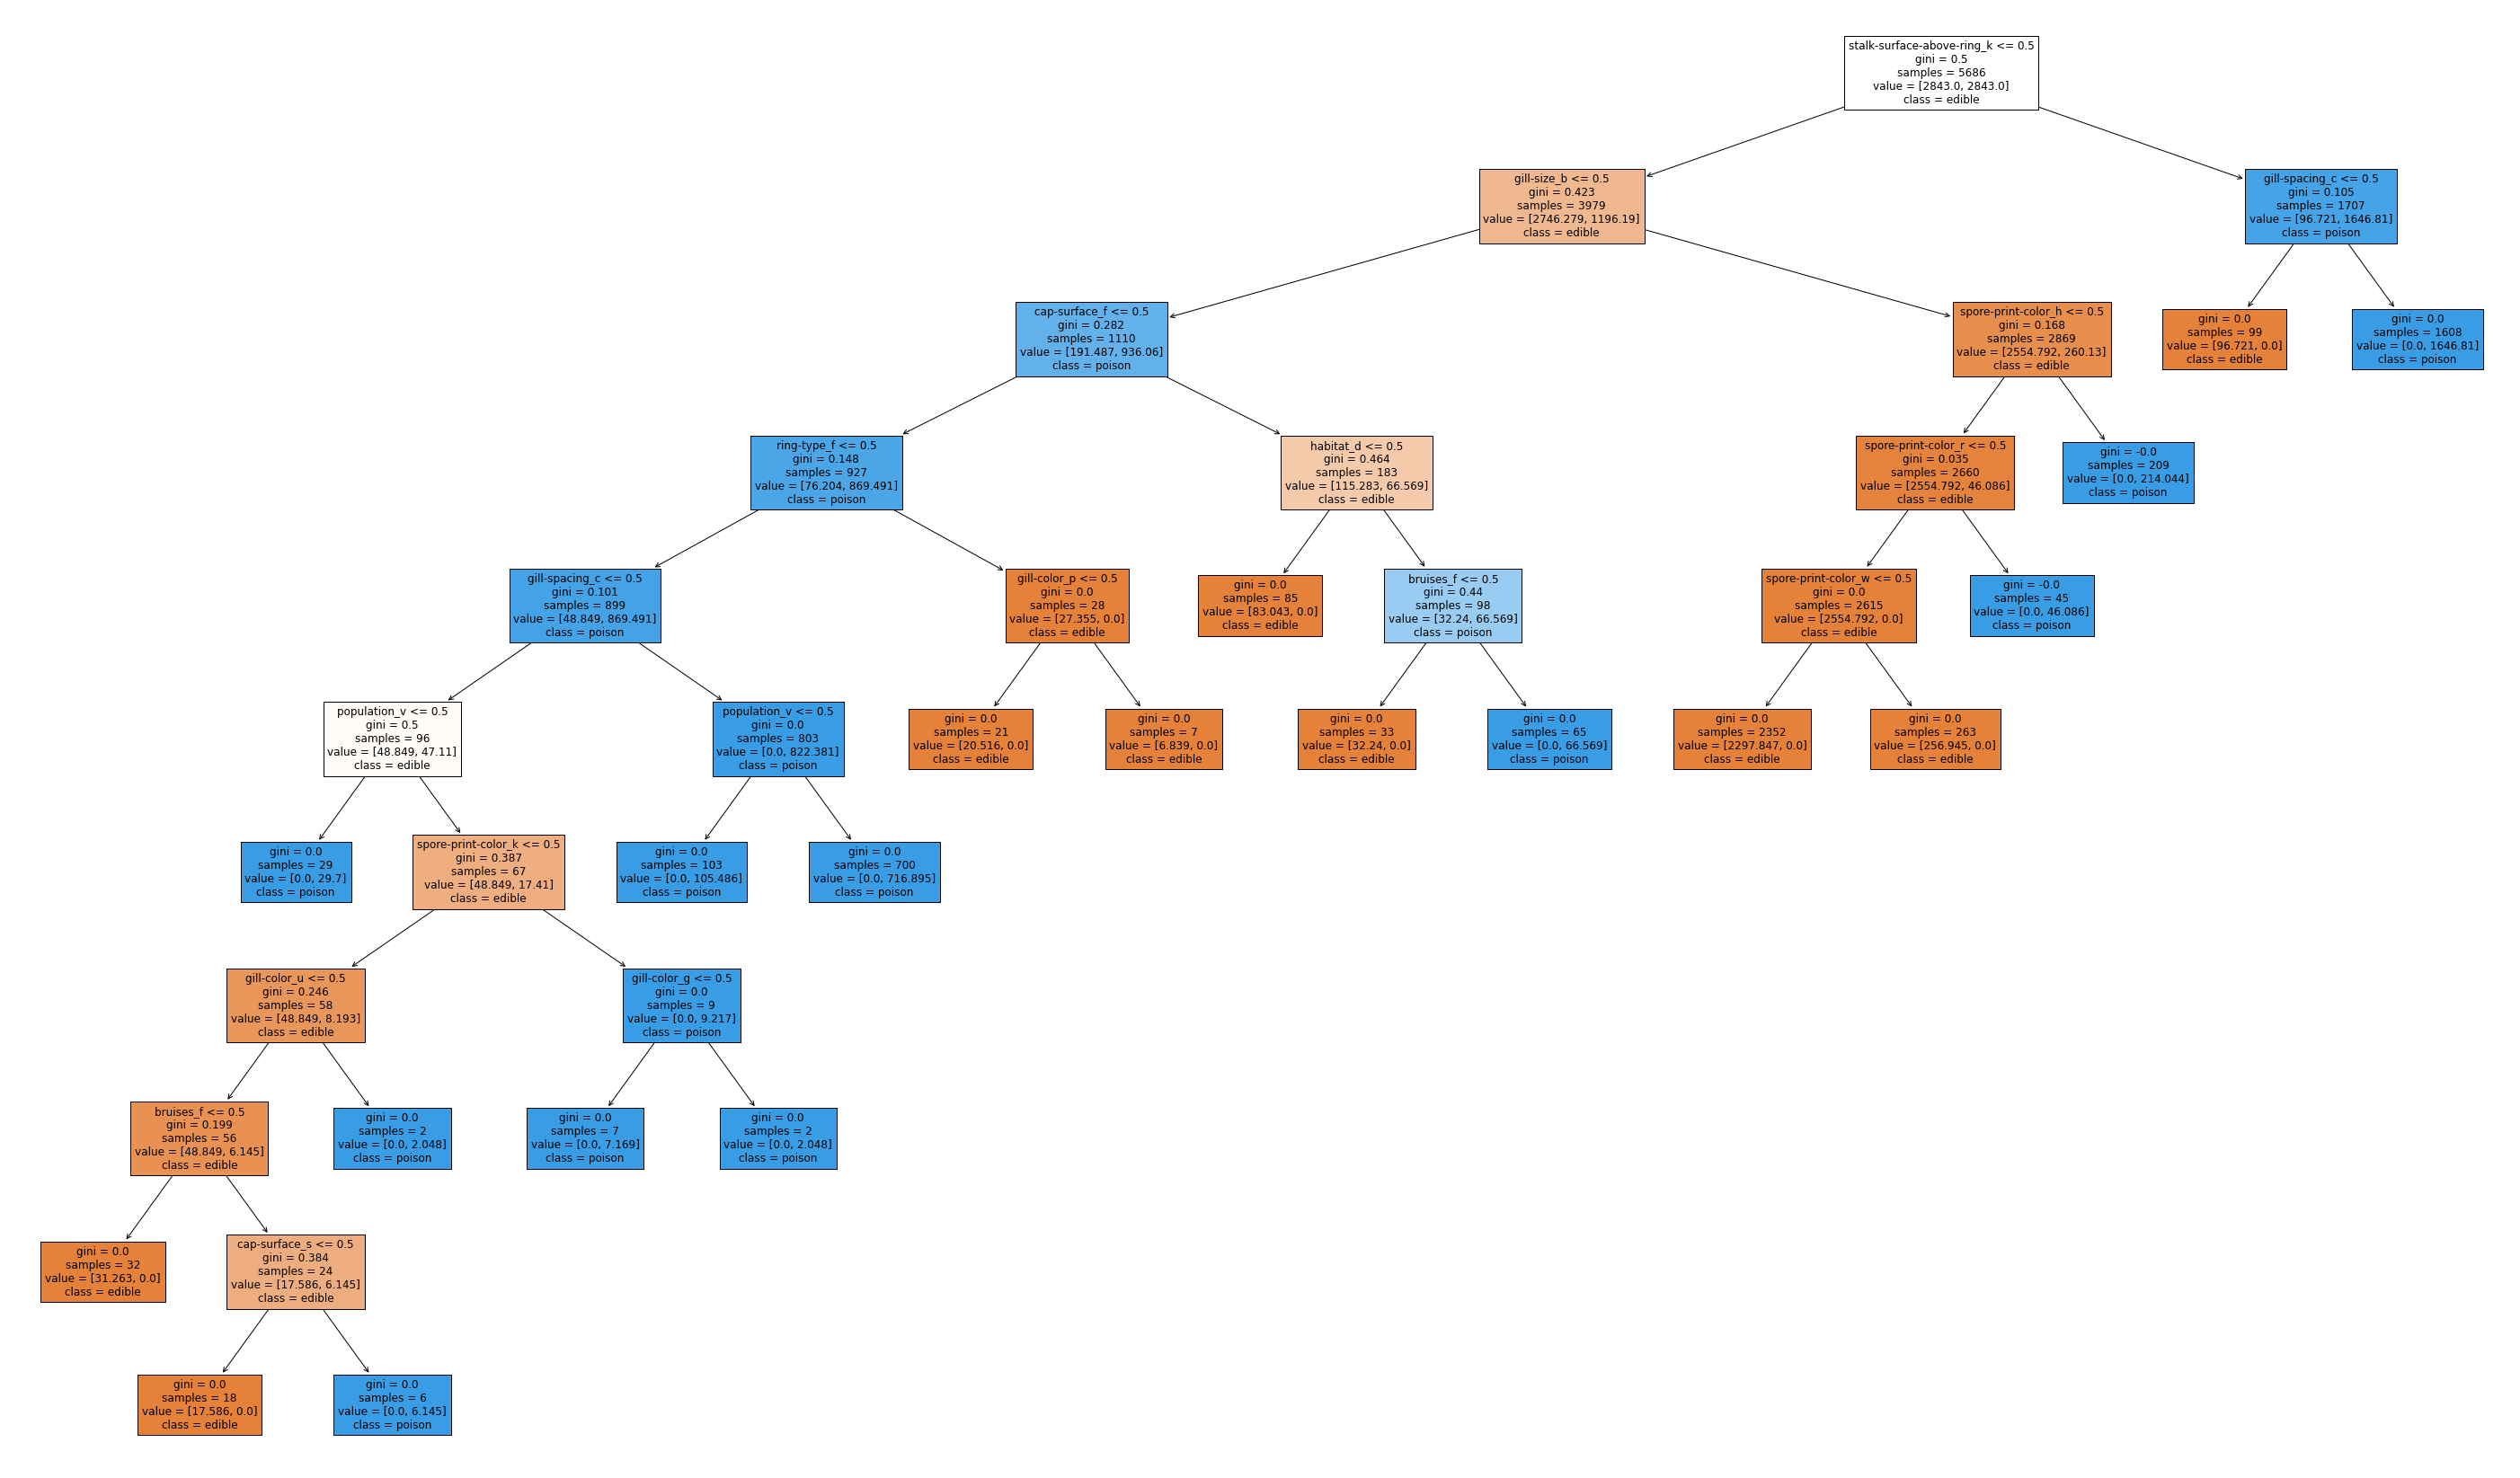

In [44]:
fig = plt.figure(figsize=(50,30))
_ = tree.plot_tree(model, 
                   feature_names=X_test.columns,  
                   class_names=["edible", "poison"],
                   filled=True)
from google.colab import files
plt.savefig("abc.png", transparent=True)
files.download("abc.png") 

In [45]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1298    0]
 [   0 1140]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1298
           1       1.00      1.00      1.00      1140

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

parameters2 = {
              'criterion' :['gini', 'entropy'],
              'min_samples_split':[2, 3, 4, 5], 
              'max_depth':[1, 2, 3, 4, 5, 6, 7, 8],
              'class_weight':('balanced', None),
             }

rf = RandomForestClassifier()
gsearch2 = GridSearchCV(rf, parameters2)
gsearch2.fit(X_train, y_train)
model2 = gsearch2.best_estimator_
model2

RandomForestClassifier(class_weight='balanced', max_depth=7)

In [47]:
y_pred2 = model2.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[1298    0]
 [   0 1140]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1298
           1       1.00      1.00      1.00      1140

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [48]:
fitur2 = model2.feature_names_in_
importance2 = model2.feature_importances_

fitur_importance2 = {'Fitur': fitur2, 'Importance Values': importance2}
fitur_importance_df2 = pd.DataFrame(data=fitur_importance2)
fitur_importance_df2.sort_values(by=['Importance Values'], ascending=False)

,Fitur,Importance Values
32,spore-print-color_h,0.097832
8,gill-size_b,0.088543
9,gill-size_n,0.081485
23,stalk-surface-above-ring_k,0.077846
30,ring-type_p,0.076975
10,gill-color_b,0.059767
4,bruises_f,0.057799
28,ring-type_l,0.048301
6,gill-spacing_c,0.045745
44,population_v,0.040451


# Secondary Data

In [61]:
data = pd.read_csv("secondary_data_no_miss.csv", sep=";") 

In [63]:
data.isnull().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [64]:
data.nunique()

class                      2
cap-diameter            2564
cap-shape                  7
cap-surface               11
cap-color                 12
does-bruise-or-bleed       2
gill-attachment            7
gill-spacing               3
gill-color                12
stem-height             2198
stem-width              4634
stem-color                13
has-ring                   2
ring-type                  8
habitat                    8
season                     4
dtype: int64